**Importing Liberaries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Importing the datasets**


*   GDC_data : The TCGA-PRAD data set from GDC with survival data
*   cBio_data : Prostate Adenocarcinoma (TCGA, Cell 2015) https://www.cbioportal.org/study/summary?id=prad_tcga_pub




In [3]:
# Load datasets
cBio_data = pd.read_csv("/content/drive/MyDrive/Cancer Data/prad_tcga_pub_clinical_data.tsv",delimiter='\t')
GDC_data = pd.read_csv("/content/drive/MyDrive/Cancer Data/tcga_prad_from_xml.csv")

In [4]:
cBio_data.sample(5)

,Study ID,Patient ID,Sample ID,Absolute Extract Ploidy,Absolute Extract Purity,Absolute Genome Doublings,Diagnosis Age,AKT1 Mutation,AR mRNA,AR Protein,...,Somatic Status,SPINK1 High,SPOPL CNA,SPOP Mutation,Subtype,TMB (nonsynonymous),TP53 CNA,TP53 Mutation,Tumor cellularity dominant pathology review,Zmym3 mut
26,prad_tcga_pub,TCGA-CH-5767,TCGA-CH-5767-01,1.98,0.83,0.0,66.0,0,1008.62,0.04,...,Matched,0,homdel,0,8-other,0.866667,diploid,0,46-55%,0
257,prad_tcga_pub,TCGA-KK-A8IK,TCGA-KK-A8IK-01,4.06,0.96,1.0,NaN,0,247.35,NaN,...,Matched,0,hetloss,1,5-SPOP,0.566667,hetloss,0,86-95%,0
167,prad_tcga_pub,TCGA-HC-7233,TCGA-HC-7233-01,2.00,0.55,0.0,73.0,0,1268.35,-0.61,...,Matched,0,diploid,0,8-other,0.933333,diploid,0,66-75%,0
24,prad_tcga_pub,TCGA-CH-5765,TCGA-CH-5765-01,1.95,0.75,0.0,55.0,0,923.37,0.37,...,Matched,0,diploid,0,1-ERG,0.800000,diploid,0,46-55%,0
100,prad_tcga_pub,TCGA-EJ-8472,TCGA-EJ-8472-01,3.80,0.62,1.0,63.0,0,347.28,NaN,...,Matched,0,diploid,0,1-ERG,1.033333,diploid,1,61-70%,0


In [5]:
GDC_data.sample(5)

,bcr,file_uuid,batch_number,project_code,disease_code,day_of_dcc_upload,month_of_dcc_upload,year_of_dcc_upload,patient_withdrawal,program,...,hormone_therapy,n_treat,os_status,os_months,dss_status,dss_months,dfs_status,dfs_months,pfs_status,pfs_months
399,Nationwide Children's Hospital,3DE9A4BB-B191-415B-BC66-9F71813B80EA,389.51.0,TCGA,PRAD,22,12,2016,False,NaN,...,True,1.0,0.0,61.676036,0.0,61.676036,NaN,NaN,0.0,61.676036
21,Nationwide Children's Hospital,C13F453B-221B-408D-8242-A009E58C5A54,91.78.0,TCGA,PRAD,22,12,2016,False,NaN,...,NaN,NaN,0.0,60.229477,0.0,60.229477,0.0,60.229477,0.0,60.229477
384,Nationwide Children's Hospital,970B70BC-052F-4986-B3CA-AEB24FFB3893,91.78.0,TCGA,PRAD,22,12,2016,False,NaN,...,NaN,NaN,0.0,0.920538,0.0,0.920538,NaN,NaN,0.0,0.920538
141,Nationwide Children's Hospital,FF97333F-EACC-435F-B3CE-43B3FA5DC966,108.76.0,TCGA,PRAD,22,12,2016,False,NaN,...,NaN,NaN,0.0,45.303613,0.0,45.303613,0.0,45.303613,0.0,45.303613
447,Nationwide Children's Hospital,2A86ED4A-3E3B-4288-A1B9-DC4DB202BF10,184.82.0,TCGA,PRAD,22,12,2016,False,NaN,...,True,1.0,0.0,109.248118,0.0,109.248118,NaN,NaN,1.0,82.355262


In [6]:
cBio_data.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Absolute Extract Ploidy',
       'Absolute Extract Purity', 'Absolute Genome Doublings', 'Diagnosis Age',
       'AKT1 Mutation', 'AR mRNA', 'AR Protein', 'AR Score', 'AR V7 Presence',
       'AR V7 Ratio', 'AR V7 Reads', 'ATM Mutation', 'Average DNA Purity',
       'Average RNA Purity', 'Batch Number', 'BRAF mutation', 'Brca1 cna',
       'BRCA1 Germline Mutation', 'BRCA1 Mutation', 'BRCA2 CNA',
       'BRCA2 Germline Mutation', 'BRCA2 Mutation', 'Cancer Type',
       'Cancer Type Detailed', 'CDK12 CNA', 'CDK12 Mutation', 'CDKN1B CNA',
       'Cdkn1b mut', 'CHD1 CNA', 'CHD1 Mutation', 'Clinical Gleason',
       'Clinical Gleason category', 'Clinical Gleason Sum', 'CLONET Purity',
       'CTNNB1 Mutation', 'DeMix Purity', 'Erg status', 'ETV1 Status',
       'ETV4 Status', 'Exon Imbalance Score', 'FAM175A CNA', 'FANCC CNA',
       'FANCC Mutation', 'FANCD2 CNA', 'FANCD2 Mutation', 'FLI1 Status',
       'FOXA1 mutation', 'Fraction Genome Alt

In [7]:
GDC_data.columns

Index(['bcr', 'file_uuid', 'batch_number', 'project_code', 'disease_code',
       'day_of_dcc_upload', 'month_of_dcc_upload', 'year_of_dcc_upload',
       'patient_withdrawal', 'program', 'dbgap_registration_code',
       'additional_studies', 'tumor_tissue_site', 'other_dx', 'gender',
       'vital_status', 'days_to_birth', 'days_to_death',
       'days_to_last_followup', 'race_list', 'bcr_patient_barcode',
       'tissue_source_site', 'patient_id', 'bcr_patient_uuid',
       'history_of_neoadjuvant_treatment', 'informed_consent_verified',
       'icd_o_3_site', 'icd_o_3_histology', 'icd_10',
       'tissue_prospective_collection_indicator',
       'tissue_retrospective_collection_indicator',
       'days_to_initial_pathologic_diagnosis',
       'age_at_initial_pathologic_diagnosis',
       'year_of_initial_pathologic_diagnosis', 'person_neoplasm_cancer_status',
       'ethnicity', 'day_of_form_completion', 'month_of_form_completion',
       'year_of_form_completion', 'histological_ty

**Joining the Datasets**

In [8]:
cBio_data = cBio_data.rename(columns={'Patient ID': 'patient_id'})

In [9]:
# Perform an inner join using 'bcr_patient_barcode' from GDC_data and 'patient_id' from cBio_data
combine_data = pd.merge(cBio_data, GDC_data, left_on='patient_id', right_on='bcr_patient_barcode', how='inner')
combine_data.shape

(327, 182)

In [10]:
# Create a summary table
column_details = pd.DataFrame({
    'Data Type': combine_data.dtypes,
    'Number of Variables': combine_data.nunique(),
    'Number of Entries': combine_data.count(),
    'Number of Null Values': combine_data.isnull().sum()
})
column_details

,Data Type,Number of Variables,Number of Entries,Number of Null Values
Study ID,object,1,327,0
patient_id_x,object,327,327,0
Sample ID,object,327,327,0
Absolute Extract Ploidy,float64,50,282,45
Absolute Extract Purity,float64,81,282,45
...,...,...,...,...
dss_months,float64,298,327,0
dfs_status,float64,2,231,96
dfs_months,float64,217,231,96
pfs_status,float64,2,327,0


In [11]:
# Renameing Columns
standardized_columns = [
    'study_id', 'patient_id', 'sample_id', 'absolute_extract_ploidy', 'absolute_extract_purity',
    'absolute_genome_doublings', 'diagnosis_age', 'akt1_mutation', 'ar_mrna', 'ar_protein',
    'ar_score', 'ar_v7_presence', 'ar_v7_ratio', 'ar_v7_reads', 'atm_mutation', 'average_dna_purity',
    'average_rna_purity', 'batch_number', 'braf_mutation', 'brca1_cna', 'brca1_germline_mutation',
    'brca1_mutation', 'brca2_cna', 'brca2_germline_mutation', 'brca2_mutation', 'cancer_type',
    'cancer_type_detailed', 'cdk12_cna', 'cdk12_mutation', 'cdkn1b_cna', 'cdkn1b_mutation', 'chd1_cna',
    'chd1_mutation', 'clinical_gleason', 'clinical_gleason_category', 'clinical_gleason_sum',
    'clonet_purity', 'ctnnb1_mutation', 'demix_purity', 'erg_status', 'etv1_status', 'etv4_status',
    'exon_imbalance_score', 'fam175a_cna', 'fancc_cna', 'fancc_mutation', 'fancd2_cna', 'fancd2_mutation',
    'fli1_status', 'foxa1_mutation', 'fraction_genome_altered', 'hras_mutation', 'icluster', 'idh1_mutation',
    'isopure_purity', 'kdm6a_mutation', 'kmt2a_mutation', 'kmt2c_mutation', 'kmt2d_mutation', 'med12_mutation',
    'methylation_cluster', 'mirna_cluster', 'mrna_expression_cluster', 'mutations', 'mutation_count', 'oncotree_code',
    'pik3ca_mutation', 'preop_psa', 'pten_cna', 'pten_mutation', 'race_category', 'rad51c_cna', 'rb1_cna',
    'rb1_mutation', 'surgical_margin_resection_status', 'reviewed_gleason', 'reviewed_gleason_category',
    'reviewed_gleason_sum', 'rppa_cluster', 'number_of_samples_per_patient', 'sample_type', 'scna_cluster',
    'setd2_mutation', 'sex', 'somatic_status', 'spink1_high', 'spopl_cna', 'spop_mutation', 'subtype',
    'tmb_nonsynonymous', 'tp53_cna', 'tp53_mutation', 'tumor_cellularity_dominant_pathology_review', 'zmym3_mutation',
    'bcr', 'file_uuid', 'batch_number', 'project_code', 'disease_code', 'day_of_dcc_upload', 'month_of_dcc_upload',
    'year_of_dcc_upload', 'patient_withdrawal', 'program', 'dbgap_registration_code', 'additional_studies',
    'tumor_tissue_site', 'other_dx', 'gender', 'vital_status', 'days_to_birth', 'days_to_death', 'days_to_last_followup',
    'race_list', 'bcr_patient_barcode', 'tissue_source_site', 'patient_id_y', 'bcr_patient_uuid',
    'history_of_neoadjuvant_treatment', 'informed_consent_verified', 'icd_o_3_site', 'icd_o_3_histology',
    'icd_10', 'tissue_prospective_collection_indicator', 'tissue_retrospective_collection_indicator',
    'days_to_initial_pathologic_diagnosis', 'age_at_initial_pathologic_diagnosis', 'year_of_initial_pathologic_diagnosis',
    'person_neoplasm_cancer_status', 'ethnicity', 'day_of_form_completion', 'month_of_form_completion',
    'year_of_form_completion', 'histological_type', 'histological_type_other', 'zone_of_origin', 'laterality',
    'tumor_levels', 'initial_pathologic_diagnosis_method', 'days_to_bone_scan_performed', 'bone_scan_results',
    'diagnostic_ct_abd_pelvis_performed', 'days_to_diagnostic_computed_tomography_performed',
    'diagnostic_ct_abd_pelvis_results', 'diagnostic_mri_performed', 'days_to_diagnostic_mri_performed',
    'diagnostic_mri_results', 'lymphnodes_examined', 'number_of_lymphnodes_examined',
    'number_of_lymphnodes_positive_by_he', 'residual_tumor', 'patient_death_reason', 'source_of_patient_death_reason',
    'stage_event', 'postoperative_rx_tx', 'radiation_therapy', 'primary_therapy_outcome_success', 'biochemical_recurrence',
    'days_to_first_biochemical_recurrence', 'new_tumor_events', 'drugs', 'radiations', 'follow_ups', 'radiotherapy',
    'abiraterone', 'bicalutamide', 'leuprorelin', 'degarelix', 'goserelin', 'triptorelin', 'anti_androgen',
    'anti_gonadotropin', 'hormone_therapy', 'n_treat', 'os_status', 'os_months', 'dss_status', 'dss_months',
    'dfs_status', 'dfs_months', 'pfs_status', 'pfs_months'
]

combine_data.columns = standardized_columns
combine_data

,study_id,patient_id,sample_id,absolute_extract_ploidy,absolute_extract_purity,absolute_genome_doublings,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,...,hormone_therapy,n_treat,os_status,os_months,dss_status,dss_months,dfs_status,dfs_months,pfs_status,pfs_months
0,prad_tcga_pub,TCGA-2A-A8VL,TCGA-2A-A8VL-01,1.97,0.50,0.0,51.0,0,297.12,1.29,...,NaN,NaN,0.0,20.416215,0.0,20.416215,NaN,NaN,0.0,20.416215
1,prad_tcga_pub,TCGA-2A-A8VO,TCGA-2A-A8VO-01,1.98,0.55,0.0,57.0,0,319.02,-0.46,...,NaN,NaN,0.0,55.922675,0.0,55.922675,NaN,NaN,0.0,55.922675
2,prad_tcga_pub,TCGA-2A-A8VT,TCGA-2A-A8VT-01,1.92,0.72,0.0,NaN,0,2750.37,1.09,...,True,1.0,0.0,45.139231,0.0,45.139231,NaN,NaN,0.0,45.139231
3,prad_tcga_pub,TCGA-2A-A8VV,TCGA-2A-A8VV-01,1.99,0.84,0.0,52.0,0,215.08,0.30,...,NaN,NaN,0.0,22.060032,0.0,22.060032,NaN,NaN,0.0,22.060032
4,prad_tcga_pub,TCGA-2A-A8W1,TCGA-2A-A8W1-01,1.96,0.93,0.0,54.0,0,608.66,-0.44,...,NaN,NaN,0.0,3.682151,0.0,3.682151,NaN,NaN,0.0,3.682151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,prad_tcga_pub,TCGA-YL-A9WJ,TCGA-YL-A9WJ-01,1.98,0.40,0.0,47.0,0,933.74,-1.14,...,NaN,NaN,1.0,60.985633,1.0,60.985633,NaN,NaN,1.0,48.525496
323,prad_tcga_pub,TCGA-ZG-A8QW,TCGA-ZG-A8QW-01,1.96,0.37,0.0,72.0,0,186.32,-0.52,...,NaN,NaN,0.0,3.090377,0.0,3.090377,NaN,NaN,0.0,3.090377
324,prad_tcga_pub,TCGA-ZG-A8QX,TCGA-ZG-A8QX-01,1.95,0.52,0.0,56.0,0,252.65,0.33,...,NaN,NaN,0.0,14.531348,0.0,14.531348,NaN,NaN,0.0,14.531348
325,prad_tcga_pub,TCGA-ZG-A8QY,TCGA-ZG-A8QY-01,1.88,0.55,0.0,67.0,0,349.24,-1.33,...,NaN,NaN,0.0,13.282046,0.0,13.282046,NaN,NaN,0.0,13.282046


In [12]:
# Selecting a cohort of interest with patients who have undertaken hormone therapy or radiotherapy
cohort = combine_data[(combine_data['hormone_therapy'] == True) | (combine_data['radiotherapy'] == True)]

# Displaying the selected cohort
cohort


,study_id,patient_id,sample_id,absolute_extract_ploidy,absolute_extract_purity,absolute_genome_doublings,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,...,hormone_therapy,n_treat,os_status,os_months,dss_status,dss_months,dfs_status,dfs_months,pfs_status,pfs_months
2,prad_tcga_pub,TCGA-2A-A8VT,TCGA-2A-A8VT-01,1.92,0.72,0.0,NaN,0,2750.37,1.09,...,True,1.0,0.0,45.139231,0.0,45.139231,NaN,NaN,0.0,45.139231
10,prad_tcga_pub,TCGA-CH-5741,TCGA-CH-5741-01,1.94,0.81,0.0,56.0,0,324.35,0.80,...,True,1.0,0.0,12.986159,0.0,12.986159,0.0,12.986159,0.0,12.986159
16,prad_tcga_pub,TCGA-CH-5751,TCGA-CH-5751-01,NaN,NaN,NaN,68.0,0,2528.04,1.97,...,True,2.0,0.0,35.013315,0.0,35.013315,1.0,11.999868,1.0,11.999868
17,prad_tcga_pub,TCGA-CH-5752,TCGA-CH-5752-01,1.97,0.79,0.0,66.0,0,2359.45,0.91,...,True,1.0,0.0,31.002400,0.0,31.002400,0.0,31.002400,0.0,31.002400
31,prad_tcga_pub,TCGA-CH-5788,TCGA-CH-5788-01,2.04,0.84,0.0,69.0,0,1730.88,1.22,...,True,2.0,0.0,26.991485,0.0,26.991485,NaN,NaN,0.0,26.991485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,prad_tcga_pub,TCGA-YL-A8SP,TCGA-YL-A8SP-01,1.94,0.87,0.0,58.0,0,1325.43,0.74,...,True,1.0,0.0,77.785449,0.0,77.785449,NaN,NaN,1.0,66.936253
318,prad_tcga_pub,TCGA-YL-A8SQ,TCGA-YL-A8SQ-01,3.52,0.64,1.0,61.0,0,750.00,-0.26,...,True,1.0,0.0,68.481441,0.0,68.481441,NaN,NaN,1.0,10.816320
320,prad_tcga_pub,TCGA-YL-A9WH,TCGA-YL-A9WH-01,3.09,0.74,1.0,67.0,0,535.35,NaN,...,True,1.0,0.0,14.038202,0.0,14.038202,NaN,NaN,0.0,14.038202
322,prad_tcga_pub,TCGA-YL-A9WJ,TCGA-YL-A9WJ-01,1.98,0.40,0.0,47.0,0,933.74,-1.14,...,NaN,NaN,1.0,60.985633,1.0,60.985633,NaN,NaN,1.0,48.525496


In [13]:
# Create a summary table
column_details = pd.DataFrame({
    'Data Type': cohort.dtypes,
    'Number of Variables': cohort.nunique(),
    'Number of Entries': cohort.count(),
    'Number of Null Values': cohort.isnull().sum()
})
column_details

,Data Type,Number of Variables,Number of Entries,Number of Null Values
study_id,object,1,69,0
patient_id,object,69,69,0
sample_id,object,69,69,0
absolute_extract_ploidy,float64,32,60,9
absolute_extract_purity,float64,40,60,9
...,...,...,...,...
dss_months,float64,67,69,0
dfs_status,float64,2,34,35
dfs_months,float64,34,34,35
pfs_status,float64,2,69,0


In [14]:
cohort.isna().sum()

study_id                    0
patient_id                  0
sample_id                   0
absolute_extract_ploidy     9
absolute_extract_purity     9
                           ..
dss_months                  0
dfs_status                 35
dfs_months                 35
pfs_status                  0
pfs_months                  0
Length: 182, dtype: int64

In [15]:
# Data Cleaning
# Checking for columns that contain the same value for all entries and removing them
columns_with_same_value = cohort.columns[cohort.nunique() == 1]
print("Columns with the same value for all entries:")
print(columns_with_same_value)
cohort=cohort.drop(columns=columns_with_same_value)
cohort

Columns with the same value for all entries:
Index(['study_id', 'brca1_germline_mutation', 'brca1_mutation',
       'brca2_mutation', 'cancer_type', 'cancer_type_detailed',
       'fancc_mutation', 'idh1_mutation', 'med12_mutation', 'oncotree_code',
       'rb1_mutation', 'number_of_samples_per_patient', 'sample_type',
       'setd2_mutation', 'sex', 'somatic_status', 'bcr', 'project_code',
       'disease_code', 'day_of_dcc_upload', 'month_of_dcc_upload',
       'year_of_dcc_upload', 'patient_withdrawal', 'tumor_tissue_site',
       'gender', 'history_of_neoadjuvant_treatment',
       'informed_consent_verified', 'icd_o_3_site', 'icd_10',
       'days_to_initial_pathologic_diagnosis', 'patient_death_reason',
       'source_of_patient_death_reason', 'degarelix'],
      dtype='object')


,patient_id,sample_id,absolute_extract_ploidy,absolute_extract_purity,absolute_genome_doublings,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,ar_score,...,hormone_therapy,n_treat,os_status,os_months,dss_status,dss_months,dfs_status,dfs_months,pfs_status,pfs_months
2,TCGA-2A-A8VT,TCGA-2A-A8VT-01,1.92,0.72,0.0,NaN,0,2750.37,1.09,-7.50,...,True,1.0,0.0,45.139231,0.0,45.139231,NaN,NaN,0.0,45.139231
10,TCGA-CH-5741,TCGA-CH-5741-01,1.94,0.81,0.0,56.0,0,324.35,0.80,4.50,...,True,1.0,0.0,12.986159,0.0,12.986159,0.0,12.986159,0.0,12.986159
16,TCGA-CH-5751,TCGA-CH-5751-01,NaN,NaN,NaN,68.0,0,2528.04,1.97,6.70,...,True,2.0,0.0,35.013315,0.0,35.013315,1.0,11.999868,1.0,11.999868
17,TCGA-CH-5752,TCGA-CH-5752-01,1.97,0.79,0.0,66.0,0,2359.45,0.91,3.06,...,True,1.0,0.0,31.002400,0.0,31.002400,0.0,31.002400,0.0,31.002400
31,TCGA-CH-5788,TCGA-CH-5788-01,2.04,0.84,0.0,69.0,0,1730.88,1.22,7.23,...,True,2.0,0.0,26.991485,0.0,26.991485,NaN,NaN,0.0,26.991485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,TCGA-YL-A8SP,TCGA-YL-A8SP-01,1.94,0.87,0.0,58.0,0,1325.43,0.74,6.91,...,True,1.0,0.0,77.785449,0.0,77.785449,NaN,NaN,1.0,66.936253
318,TCGA-YL-A8SQ,TCGA-YL-A8SQ-01,3.52,0.64,1.0,61.0,0,750.00,-0.26,10.78,...,True,1.0,0.0,68.481441,0.0,68.481441,NaN,NaN,1.0,10.816320
320,TCGA-YL-A9WH,TCGA-YL-A9WH-01,3.09,0.74,1.0,67.0,0,535.35,NaN,-11.80,...,True,1.0,0.0,14.038202,0.0,14.038202,NaN,NaN,0.0,14.038202
322,TCGA-YL-A9WJ,TCGA-YL-A9WJ-01,1.98,0.40,0.0,47.0,0,933.74,-1.14,0.95,...,NaN,NaN,1.0,60.985633,1.0,60.985633,NaN,NaN,1.0,48.525496


In [16]:
# Checking for columns no value (all null values) and removing them
columns_with_no_values = (cohort.columns[cohort.isnull().all()])
print("Columns with No values for all entries:")
print(columns_with_no_values)
cohort = cohort.drop(columns=columns_with_no_values)
cohort

Columns with No values for all entries:
Index(['program', 'dbgap_registration_code', 'additional_studies'], dtype='object')


,patient_id,sample_id,absolute_extract_ploidy,absolute_extract_purity,absolute_genome_doublings,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,ar_score,...,hormone_therapy,n_treat,os_status,os_months,dss_status,dss_months,dfs_status,dfs_months,pfs_status,pfs_months
2,TCGA-2A-A8VT,TCGA-2A-A8VT-01,1.92,0.72,0.0,NaN,0,2750.37,1.09,-7.50,...,True,1.0,0.0,45.139231,0.0,45.139231,NaN,NaN,0.0,45.139231
10,TCGA-CH-5741,TCGA-CH-5741-01,1.94,0.81,0.0,56.0,0,324.35,0.80,4.50,...,True,1.0,0.0,12.986159,0.0,12.986159,0.0,12.986159,0.0,12.986159
16,TCGA-CH-5751,TCGA-CH-5751-01,NaN,NaN,NaN,68.0,0,2528.04,1.97,6.70,...,True,2.0,0.0,35.013315,0.0,35.013315,1.0,11.999868,1.0,11.999868
17,TCGA-CH-5752,TCGA-CH-5752-01,1.97,0.79,0.0,66.0,0,2359.45,0.91,3.06,...,True,1.0,0.0,31.002400,0.0,31.002400,0.0,31.002400,0.0,31.002400
31,TCGA-CH-5788,TCGA-CH-5788-01,2.04,0.84,0.0,69.0,0,1730.88,1.22,7.23,...,True,2.0,0.0,26.991485,0.0,26.991485,NaN,NaN,0.0,26.991485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,TCGA-YL-A8SP,TCGA-YL-A8SP-01,1.94,0.87,0.0,58.0,0,1325.43,0.74,6.91,...,True,1.0,0.0,77.785449,0.0,77.785449,NaN,NaN,1.0,66.936253
318,TCGA-YL-A8SQ,TCGA-YL-A8SQ-01,3.52,0.64,1.0,61.0,0,750.00,-0.26,10.78,...,True,1.0,0.0,68.481441,0.0,68.481441,NaN,NaN,1.0,10.816320
320,TCGA-YL-A9WH,TCGA-YL-A9WH-01,3.09,0.74,1.0,67.0,0,535.35,NaN,-11.80,...,True,1.0,0.0,14.038202,0.0,14.038202,NaN,NaN,0.0,14.038202
322,TCGA-YL-A9WJ,TCGA-YL-A9WJ-01,1.98,0.40,0.0,47.0,0,933.74,-1.14,0.95,...,NaN,NaN,1.0,60.985633,1.0,60.985633,NaN,NaN,1.0,48.525496


In [17]:
# Dropping the irrelevent identifers from the DataFrame
identifers_col = ['patient_id','sample_id', 'batch_number', 'file_uuid', 'patient_id_y', 'bcr_patient_uuid','bcr_patient_barcode']

cohort = cohort.drop(columns=identifers_col)

In [18]:
# Check for missing values and get the count of null values for each column
null_counts = cohort.isnull().sum()

# Display the entire list of columns with their null counts
for column, count in null_counts.items():
  if count > 0:
    print(f"{column} : {count}")

absolute_extract_ploidy : 9
absolute_extract_purity : 9
absolute_genome_doublings : 9
diagnosis_age : 13
ar_protein : 19
average_dna_purity : 4
clinical_gleason : 13
clinical_gleason_category : 13
clinical_gleason_sum : 13
clonet_purity : 6
mirna_cluster : 1
preop_psa : 41
race_category : 3
surgical_margin_resection_status : 15
rppa_cluster : 19
days_to_birth : 2
days_to_death : 67
days_to_last_followup : 2
race_list : 2
year_of_initial_pathologic_diagnosis : 3
person_neoplasm_cancer_status : 23
ethnicity : 18
histological_type_other : 67
zone_of_origin : 17
laterality : 2
tumor_levels : 14
initial_pathologic_diagnosis_method : 1
days_to_bone_scan_performed : 23
bone_scan_results : 21
diagnostic_ct_abd_pelvis_performed : 12
days_to_diagnostic_computed_tomography_performed : 33
diagnostic_ct_abd_pelvis_results : 33
diagnostic_mri_performed : 11
days_to_diagnostic_mri_performed : 51
diagnostic_mri_results : 50
number_of_lymphnodes_examined : 8
number_of_lymphnodes_positive_by_he : 11
res

In [19]:
# Removing unnesseary columns
columns_to_drop = ['absolute_extract_ploidy','absolute_extract_purity','absolute_genome_doublings', 'ar_v7_reads',
                   'average_dna_purity' , 'average_rna_purity' ,'clinical_gleason','clinical_gleason_category',
                   'icluster' , 'methylation_cluster' , 'mirna_cluster' , 'mrna_expression_cluster','days_to_birth',
                   'days_to_death' ,'preop_psa','race_category','reviewed_gleason','reviewed_gleason_category',
                   'rppa_cluster','race_list', 'year_of_initial_pathologic_diagnosis', 'tissue_source_site' ,
                   'tissue_prospective_collection_indicator' , 'tissue_retrospective_collection_indicator' ,
                   'ethnicity','day_of_form_completion', 'month_of_form_completion','year_of_form_completion',
                   'histological_type_other','tumor_levels','dfs_status','dfs_months','radiations','drugs',
                   'follow_ups','dss_status','dss_months','zone_of_origin','stage_event']
cohort = cohort.drop(columns=columns_to_drop)

In [20]:
from sklearn.impute import KNNImputer


# diagnosis_age - mode
cohort['diagnosis_age'].fillna(cohort['diagnosis_age'].mode()[0], inplace=True)

# ar_protein - KNN
knn_imputer = KNNImputer(n_neighbors=5)
ar_protein_values = cohort[['ar_protein']]
cohort[['ar_protein']] = knn_imputer.fit_transform(ar_protein_values)

# clinical_gleason_sum - mode
cohort['clinical_gleason_sum'].fillna(cohort['clinical_gleason_sum'].mode()[0], inplace=True)

# clonet_purity - KNN
clonet_purity_values = cohort[['clonet_purity']]
cohort[['clonet_purity']] = knn_imputer.fit_transform(clonet_purity_values)

# mutation_count - median
cohort['mutation_count'].fillna(cohort['mutation_count'].median(), inplace=True)

# surgical_margin_resection_status - mode
cohort['surgical_margin_resection_status'].fillna(cohort['surgical_margin_resection_status'].mode()[0], inplace=True)

# laterality - mode
cohort['laterality'].fillna(cohort['laterality'].mode()[0], inplace=True)

# Replace specific columns with values
columns_to_replace = {
    'days_to_last_followup': 0,
    'person_neoplasm_cancer_status': 'unknown',
    'initial_pathologic_diagnosis_method': cohort['initial_pathologic_diagnosis_method'].mode()[0],
    'days_to_bone_scan_performed': 0,
    'bone_scan_results': 'Not performed',
    'diagnostic_ct_abd_pelvis_performed': 'NO',
    'days_to_diagnostic_computed_tomography_performed': 0,
    'diagnostic_ct_abd_pelvis_results': 'Not Performed',
    'diagnostic_mri_performed': 'NO',
    'days_to_diagnostic_mri_performed': 0,
    'diagnostic_mri_results': 'Not performed',
    'lymphnodes_examined': 'NO',
    'number_of_lymphnodes_examined': 0,
    'number_of_lymphnodes_positive_by_he': 0,
    'residual_tumor': 'Unknown',
    'postoperative_rx_tx': 'NO',
    'radiation_therapy': 'NO',
    'primary_therapy_outcome_success': 'Unknown',
    'biochemical_recurrence': 'NO',
    'days_to_first_biochemical_recurrence': 0,
    'new_tumor_events': 'NO',
    'hormone_therapy': False,
    'abiraterone': False,
    'bicalutamide': False,
    'leuprorelin': False,
    'goserelin': False,
    'triptorelin': False,
    'anti_androgen': False,
    'anti_gonadotropin': False,
    'n_treat': False
}

for col, value in columns_to_replace.items():
    cohort[col].fillna(value, inplace=True)

cohort


,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,ar_score,ar_v7_presence,ar_v7_ratio,atm_mutation,braf_mutation,brca1_cna,...,goserelin,triptorelin,anti_androgen,anti_gonadotropin,hormone_therapy,n_treat,os_status,os_months,pfs_status,pfs_months
2,58.0,0,2750.37,1.0900,-7.50,1,16.35,0,0,hetloss,...,False,False,False,True,True,1.0,0.0,45.139231,0.0,45.139231
10,56.0,0,324.35,0.8000,4.50,1,14.29,0,0,diploid,...,False,False,False,True,True,1.0,0.0,12.986159,0.0,12.986159
16,68.0,0,2528.04,1.9700,6.70,1,16.20,0,0,diploid,...,False,False,True,True,True,2.0,0.0,35.013315,1.0,11.999868
17,66.0,0,2359.45,0.9100,3.06,1,3.92,0,0,diploid,...,False,False,False,True,True,1.0,0.0,31.002400,0.0,31.002400
31,69.0,0,1730.88,1.2200,7.23,0,1.96,0,0,diploid,...,False,True,False,True,True,2.0,0.0,26.991485,0.0,26.991485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,58.0,0,1325.43,0.7400,6.91,0,1.39,0,0,diploid,...,False,False,True,False,True,1.0,0.0,77.785449,1.0,66.936253
318,61.0,0,750.00,-0.2600,10.78,0,0.00,0,0,diploid,...,False,False,False,True,True,1.0,0.0,68.481441,1.0,10.816320
320,67.0,0,535.35,-0.1694,-11.80,1,6.25,0,0,diploid,...,False,True,False,True,True,1.0,0.0,14.038202,0.0,14.038202
322,47.0,0,933.74,-1.1400,0.95,1,3.64,0,0,diploid,...,False,False,False,False,False,False,1.0,60.985633,1.0,48.525496


In [21]:
# Check for missing values and get the count of null values for each column
null_counts = cohort.isnull().sum()

# Display the entire list of columns with their null counts
for column, count in null_counts.items():
  if count > 0:
    print(f"{column} : {count}")


In [22]:
# Replace values in new_tumor_events other than 'NO' with 'YES' and 'NONO' with 'NO'
cohort.loc[cohort['new_tumor_events'] == 'NONO', 'new_tumor_events'] = 'NO'
cohort.loc[cohort['new_tumor_events'] != 'NO', 'new_tumor_events'] = 'YES'

In [23]:
pfs_df = cohort
pfs_df

,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,ar_score,ar_v7_presence,ar_v7_ratio,atm_mutation,braf_mutation,brca1_cna,...,goserelin,triptorelin,anti_androgen,anti_gonadotropin,hormone_therapy,n_treat,os_status,os_months,pfs_status,pfs_months
2,58.0,0,2750.37,1.0900,-7.50,1,16.35,0,0,hetloss,...,False,False,False,True,True,1.0,0.0,45.139231,0.0,45.139231
10,56.0,0,324.35,0.8000,4.50,1,14.29,0,0,diploid,...,False,False,False,True,True,1.0,0.0,12.986159,0.0,12.986159
16,68.0,0,2528.04,1.9700,6.70,1,16.20,0,0,diploid,...,False,False,True,True,True,2.0,0.0,35.013315,1.0,11.999868
17,66.0,0,2359.45,0.9100,3.06,1,3.92,0,0,diploid,...,False,False,False,True,True,1.0,0.0,31.002400,0.0,31.002400
31,69.0,0,1730.88,1.2200,7.23,0,1.96,0,0,diploid,...,False,True,False,True,True,2.0,0.0,26.991485,0.0,26.991485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,58.0,0,1325.43,0.7400,6.91,0,1.39,0,0,diploid,...,False,False,True,False,True,1.0,0.0,77.785449,1.0,66.936253
318,61.0,0,750.00,-0.2600,10.78,0,0.00,0,0,diploid,...,False,False,False,True,True,1.0,0.0,68.481441,1.0,10.816320
320,67.0,0,535.35,-0.1694,-11.80,1,6.25,0,0,diploid,...,False,True,False,True,True,1.0,0.0,14.038202,0.0,14.038202
322,47.0,0,933.74,-1.1400,0.95,1,3.64,0,0,diploid,...,False,False,False,False,False,False,1.0,60.985633,1.0,48.525496


In [24]:
for i in pfs_df.columns:
  print(i)

diagnosis_age
akt1_mutation
ar_mrna
ar_protein
ar_score
ar_v7_presence
ar_v7_ratio
atm_mutation
braf_mutation
brca1_cna
brca2_cna
brca2_germline_mutation
cdk12_cna
cdk12_mutation
cdkn1b_cna
cdkn1b_mutation
chd1_cna
chd1_mutation
clinical_gleason_sum
clonet_purity
ctnnb1_mutation
demix_purity
erg_status
etv1_status
etv4_status
exon_imbalance_score
fam175a_cna
fancc_cna
fancd2_cna
fancd2_mutation
fli1_status
foxa1_mutation
fraction_genome_altered
hras_mutation
isopure_purity
kdm6a_mutation
kmt2a_mutation
kmt2c_mutation
kmt2d_mutation
mutations
mutation_count
pik3ca_mutation
pten_cna
pten_mutation
rad51c_cna
rb1_cna
surgical_margin_resection_status
reviewed_gleason_sum
scna_cluster
spink1_high
spopl_cna
spop_mutation
subtype
tmb_nonsynonymous
tp53_cna
tp53_mutation
tumor_cellularity_dominant_pathology_review
zmym3_mutation
other_dx
vital_status
days_to_last_followup
icd_o_3_histology
age_at_initial_pathologic_diagnosis
person_neoplasm_cancer_status
histological_type
laterality
initial_pat

**Overview of the Therapy Response**






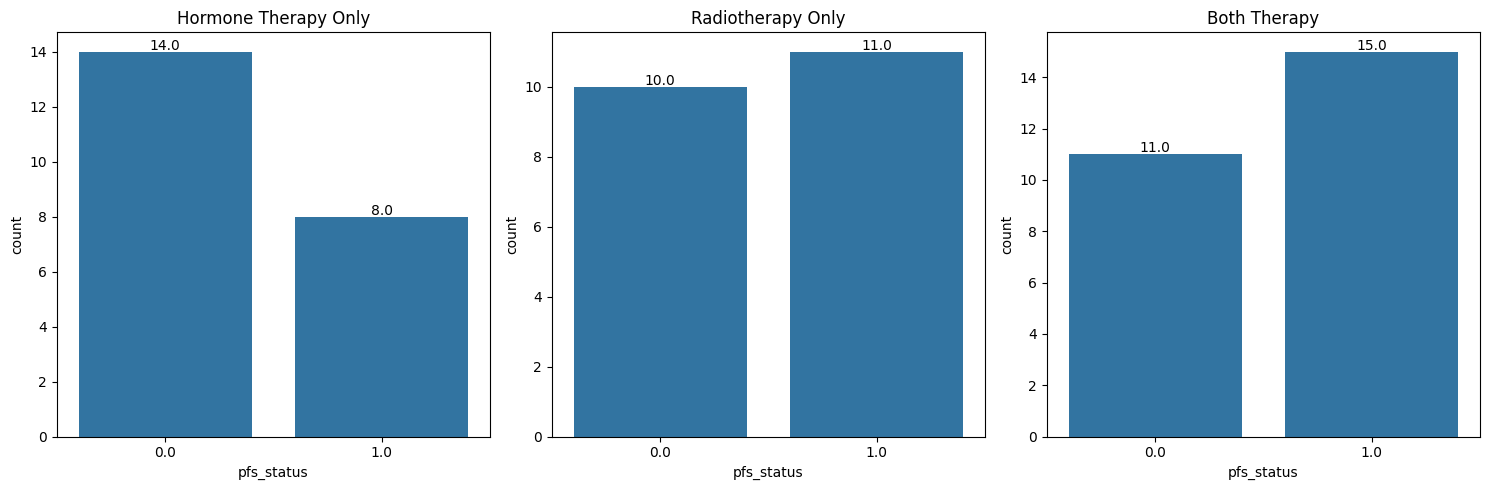

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for hormone_therapy = True
hormone_true = pfs_df[(pfs_df['hormone_therapy'] == True) & (pfs_df['radiotherapy'] == False)]

# Filter data for radiotherapy = True
radio_true = pfs_df[(pfs_df['radiotherapy'] == True) & (pfs_df['hormone_therapy'] == False)]

# Filter data for both hormone_therapy = True and radiotherapy = True
both_true = pfs_df[(pfs_df['hormone_therapy'] == True) & (pfs_df['radiotherapy'] == True)]

# Create subplots for count of pfs_status
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot count of pfs_status when hormone_therapy is True
sns.countplot(x='pfs_status', data=hormone_true, ax=axes[0])
axes[0].set_title('Hormone Therapy Only')
for p in axes[0].patches:
    axes[0].annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot count of pfs_status when radiotherapy is True
sns.countplot(x='pfs_status', data=radio_true, ax=axes[1])
axes[1].set_title('Radiotherapy Only')
for p in axes[1].patches:
    axes[1].annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot count of pfs_status when both hormone_therapy and radiotherapy are True
sns.countplot(x='pfs_status', data=both_true, ax=axes[2])
axes[2].set_title('Both Therapy')
for p in axes[2].patches:
    axes[2].annotate(f'\n{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


In [26]:
# Selecting numeric columns only
pfs_numeric_cols = pfs_df.select_dtypes(include=['int64', 'float64']).columns

# Selecting boolean columns
pfs_bool_cols = pfs_df.select_dtypes(include=['bool']).columns

# Selecting categorical columns only
pfs_categorical_cols = pfs_df.select_dtypes(include=['object']).columns

# Encoding categorical columns using one-hot encoding
pfs_encoded_categorical = pd.get_dummies(pfs_df[pfs_categorical_cols])

# Combining processed data including numeric, boolean, and encoded categorical columns
pfs_processed_data = pd.concat([pfs_df[pfs_numeric_cols],
                                pfs_df[pfs_bool_cols].astype(int),
                                pfs_encoded_categorical], axis=1)
# Clean column names
pfs_processed_data.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in pfs_processed_data.columns]

# Defining the target column
target_column = 'pfs_status'

# Assigning Features to X and Target variable to y
pfs_X = pfs_processed_data.drop(columns=[target_column])  # Features
pfs_y = pfs_processed_data[target_column]  # Target variable


In [27]:
pfs_X

,diagnosis_age,akt1_mutation,ar_mrna,ar_protein,ar_score,ar_v7_presence,ar_v7_ratio,atm_mutation,braf_mutation,brca2_germline_mutation,...,primary_therapy_outcome_success_Progressive_Disease,primary_therapy_outcome_success_Stable_Disease,primary_therapy_outcome_success_Unknown,biochemical_recurrence_NO,biochemical_recurrence_YES,new_tumor_events_NO,new_tumor_events_YES,n_treat_False,n_treat_1_0,n_treat_2_0
2,58.0,0,2750.37,1.0900,-7.50,1,16.35,0,0,0,...,0,0,1,1,0,1,0,0,1,0
10,56.0,0,324.35,0.8000,4.50,1,14.29,0,0,0,...,0,0,1,1,0,1,0,0,1,0
16,68.0,0,2528.04,1.9700,6.70,1,16.20,0,0,0,...,0,0,1,1,0,1,0,0,0,1
17,66.0,0,2359.45,0.9100,3.06,1,3.92,0,0,0,...,0,0,1,1,0,1,0,0,1,0
31,69.0,0,1730.88,1.2200,7.23,0,1.96,0,0,0,...,0,0,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,58.0,0,1325.43,0.7400,6.91,0,1.39,0,0,0,...,0,1,0,1,0,1,0,0,1,0
318,61.0,0,750.00,-0.2600,10.78,0,0.00,0,0,0,...,0,1,0,0,1,0,1,0,1,0
320,67.0,0,535.35,-0.1694,-11.80,1,6.25,0,0,0,...,0,1,0,1,0,1,0,0,1,0
322,47.0,0,933.74,-1.1400,0.95,1,3.64,0,0,0,...,1,0,0,0,1,0,1,1,0,0


In [28]:
# Calculating correlation matrix
pfs_correlation_matrix = pfs_processed_data.corr()

# Assingning 'target_column' as pfs_status
target_column = 'pfs_status'
pfs_correlation_with_target = np.abs(pfs_correlation_matrix[target_column]).sort_values(ascending=False)

# Initialize an empty list to store selected features
corr_selection = []

# Displaying correlations higher than 0.10 with the target variable
flag = 1
for col, val in pfs_correlation_with_target.items():
  if val >=(0.10):
    print(f'{flag} {col} : {val}')
    flag+=1

    # Append the feature to the list
    corr_selection.append(col)


# Correlation Heatmap
# sns.heatmap(pfs_correlation_matrix)
# plt.show()

1 pfs_status : 1.0
2 new_tumor_events_NO : 0.5204149894804522
3 new_tumor_events_YES : 0.5204149894804521
4 days_to_first_biochemical_recurrence : 0.42207241326603034
5 biochemical_recurrence_NO : 0.4147134630573715
6 biochemical_recurrence_YES : 0.4147134630573714
7 os_months : 0.32187620310175064
8 days_to_last_followup : 0.29647452769657645
9 pten_cna_diploid : 0.29373714883385443
10 primary_therapy_outcome_success_Progressive_Disease : 0.28358912905407196
11 subtype_5_SPOP : 0.2834739355610353
12 spop_mutation : 0.28347393556103523
13 postoperative_rx_tx_NO : 0.2831936878388824
14 postoperative_rx_tx_YES : 0.2831936878388823
15 primary_therapy_outcome_success_Unknown : 0.277170219691122
16 pten_cna_hetloss : 0.2708495902526491
17 person_neoplasm_cancer_status_WITH_TUMOR : 0.258730809114291
18 tumor_cellularity_dominant_pathology_review_66_75_ : 0.2516911128538169
19 erg_status_fusion : 0.24599910075929363
20 subtype_1_ERG : 0.24599910075929363
21 erg_status_none : 0.245999100759293

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(pfs_X, pfs_y)

# Extracting feature importances
pfs_feature_importances = rf.feature_importances_
pfs_feature_importances_df = pd.DataFrame({'Feature': pfs_X.columns, 'Importance': pfs_feature_importances})
pfs_feature_importances_df = pfs_feature_importances_df.sort_values(by='Importance', ascending=False)

# Selecting features with non-zero Importance (important features)
pfs_feature_importances_df = pfs_feature_importances_df[pfs_feature_importances_df['Importance'] != 0]

# Initialize an empty list to store selected features
rf_selection = []

# Displaying feature importances
flag=0
for index, row in pfs_feature_importances_df.iterrows():
  flag +=1
  print(f" {flag} {row['Feature']} : {row['Importance']}")

  # Append the feature to the list
  rf_selection.append(col)



 1 new_tumor_events_NO : 0.06128345217084653
 2 os_months : 0.039892197935872155
 3 pfs_months : 0.03971106852498879
 4 days_to_first_biochemical_recurrence : 0.037996590677021776
 5 new_tumor_events_YES : 0.03190511219017764
 6 tmb_nonsynonymous : 0.03014427428851088
 7 ar_score : 0.026834623916631002
 8 clonet_purity : 0.02647668086468123
 9 days_to_last_followup : 0.024172083882229023
 10 mutation_count : 0.021851257281256923
 11 age_at_initial_pathologic_diagnosis : 0.02013068724614687
 12 demix_purity : 0.019846953355532947
 13 isopure_purity : 0.017803083816500986
 14 pten_cna_diploid : 0.017738575937314892
 15 biochemical_recurrence_YES : 0.017564348469703665
 16 exon_imbalance_score : 0.01752710022522003
 17 mutations : 0.016820996786592334
 18 fraction_genome_altered : 0.015442349858802173
 19 days_to_bone_scan_performed : 0.015397615122853155
 20 number_of_lymphnodes_examined : 0.015218202459729218
 21 spop_mutation : 0.01509738286862909
 22 ar_protein : 0.014965979255381935


In [30]:
from xgboost import XGBClassifier

# Feature selection using XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(pfs_X, pfs_y)

# Extracting feature importances
pfs_xgb_feature_importances = xgb.feature_importances_
pfs_xgb_feature_importances_df = pd.DataFrame({'Feature': pfs_X.columns, 'Importance': pfs_xgb_feature_importances})
pfs_xgb_feature_importances_df = pfs_xgb_feature_importances_df.sort_values(by='Importance', ascending=False)

# Selecting features with non-zero Importance (important features)
pfs_xgb_feature_importances_df = pfs_xgb_feature_importances_df[pfs_xgb_feature_importances_df['Importance'] != 0]

# Initialize an empty list to store selected features
xgb_selection = []

# Displaying feature importances
flag=0
for index, row in pfs_xgb_feature_importances_df.iterrows():
  flag +=1
  print(f" {flag} {row['Feature']} : {row['Importance']}")

  # Append the feature to the list
  xgb_selection.append(col)



 1 new_tumor_events_NO : 0.19102030992507935
 2 spop_mutation : 0.11617100238800049
 3 days_to_first_biochemical_recurrence : 0.10306775569915771
 4 exon_imbalance_score : 0.07475883513689041
 5 clonet_purity : 0.04315370321273804
 6 person_neoplasm_cancer_status_WITH_TUMOR : 0.03493815287947655
 7 mutations : 0.03315376490354538
 8 diagnosis_age : 0.0329509936273098
 9 number_of_lymphnodes_examined : 0.03198464959859848
 10 tumor_cellularity_dominant_pathology_review_41_50_ : 0.030683420598506927
 11 pfs_months : 0.026896921917796135
 12 number_of_lymphnodes_positive_by_he : 0.024805577471852303
 13 fraction_genome_altered : 0.023657187819480896
 14 reviewed_gleason_sum : 0.02034701779484749
 15 days_to_last_followup : 0.019535915926098824
 16 os_months : 0.019514573737978935
 17 pten_cna_diploid : 0.01790752448141575
 18 erg_status_fusion : 0.017655549570918083
 19 brca1_cna_diploid : 0.016341036185622215
 20 residual_tumor_R1 : 0.014032947830855846
 21 ar_score : 0.01332858297973871

In [31]:

# corr_selection, rf_selection, xgb_selection, lasso_selection

# Convert the lists to sets for easier comparison
rf_set = set(rf_selection)
xgb_set = set(xgb_selection)
corr_set = set(corr_selection)
# lasso_set = set(lasso_selection)

# Find common features among all three methods
common_features_all = rf_set.intersection(xgb_set, corr_set)

# Find features present in any two methods but not the third
symmetric_difference = (rf_set.symmetric_difference(xgb_set)
                        .union(rf_set.symmetric_difference(corr_set))
                        # .union(rf_set.symmetric_difference(lasso_set))
                        .union(xgb_set.symmetric_difference(corr_set)))
                        # .union(xgb_set.symmetric_difference(lasso_set))
                        # .union(corr_set.symmetric_difference(lasso_set)))

# Find unique features for each method
unique_rf = rf_set - xgb_set - corr_set
unique_xgb = xgb_set - rf_set - corr_set
unique_corr = corr_set - rf_set - xgb_set

# Print results
print("Common features among all methods:", common_features_all)
print("features present in any two methods but not the third")
flag = 0
for i in symmetric_difference:
  flag +=1
  print(f"{flag} : {i}")
# print("Features present in any two methods but not the third:", symmetric_difference)
print("Unique features for Random Forest:", unique_rf)
print("Unique features for XGBoost:", unique_xgb)
print("Unique features for Correlation:", unique_corr)
# print("Unique features for Lasso:", unique_lasso)



Common features among all methods: set()
features present in any two methods but not the third
1 : hras_mutation
2 : radiation_therapy_NO
3 : subtype_5_SPOP
4 : tumor_cellularity_dominant_pathology_review_81_90_
5 : brca2_cna_diploid
6 : fam175a_cna_diploid
7 : postoperative_rx_tx_NO
8 : diagnostic_ct_abd_pelvis_results_Extraprostatic_Extension__Localized__e_g__seminal_vesicles_
9 : anti_androgen
10 : days_to_last_followup
11 : residual_tumor_Unknown
12 : age_at_initial_pathologic_diagnosis
13 : diagnostic_mri_results_Equivocal
14 : postoperative_rx_tx_YES
15 : days_to_diagnostic_computed_tomography_performed
16 : diagnostic_mri_results_Not_performed
17 : spop_mutation
18 : chd1_cna_diploid
19 : tp53_mutation
20 : cdkn1b_cna_homdel
21 : tumor_cellularity_dominant_pathology_review_21_30_
22 : tumor_cellularity_dominant_pathology_review_66_75_
23 : icd_o_3_histology_8255_3
24 : diagnostic_ct_abd_pelvis_performed_NO
25 : bone_scan_results_Abnormal__not_related_to_prostate_cancer_
26 : etv

In [32]:
# Filter out column names that are present in symmetric_difference and also in pfs_X
selected_columns = [col for col in symmetric_difference if col in pfs_X.columns]

# Select the columns that exist in both symmetric_difference and pfs_X
pfs_X = pfs_X[selected_columns]


In [33]:
flag = 0
for col in pfs_X:
  flag += 1
  print(f"{flag} : {col}")

1 : hras_mutation
2 : radiation_therapy_NO
3 : subtype_5_SPOP
4 : tumor_cellularity_dominant_pathology_review_81_90_
5 : brca2_cna_diploid
6 : fam175a_cna_diploid
7 : postoperative_rx_tx_NO
8 : diagnostic_ct_abd_pelvis_results_Extraprostatic_Extension__Localized__e_g__seminal_vesicles_
9 : anti_androgen
10 : days_to_last_followup
11 : residual_tumor_Unknown
12 : age_at_initial_pathologic_diagnosis
13 : diagnostic_mri_results_Equivocal
14 : postoperative_rx_tx_YES
15 : days_to_diagnostic_computed_tomography_performed
16 : diagnostic_mri_results_Not_performed
17 : spop_mutation
18 : chd1_cna_diploid
19 : tp53_mutation
20 : cdkn1b_cna_homdel
21 : tumor_cellularity_dominant_pathology_review_21_30_
22 : tumor_cellularity_dominant_pathology_review_66_75_
23 : icd_o_3_histology_8255_3
24 : diagnostic_ct_abd_pelvis_performed_NO
25 : bone_scan_results_Abnormal__not_related_to_prostate_cancer_
26 : etv1_status_high
27 : pik3ca_mutation
28 : demix_purity
29 : fli1_status_none
30 : radiotherapy
31

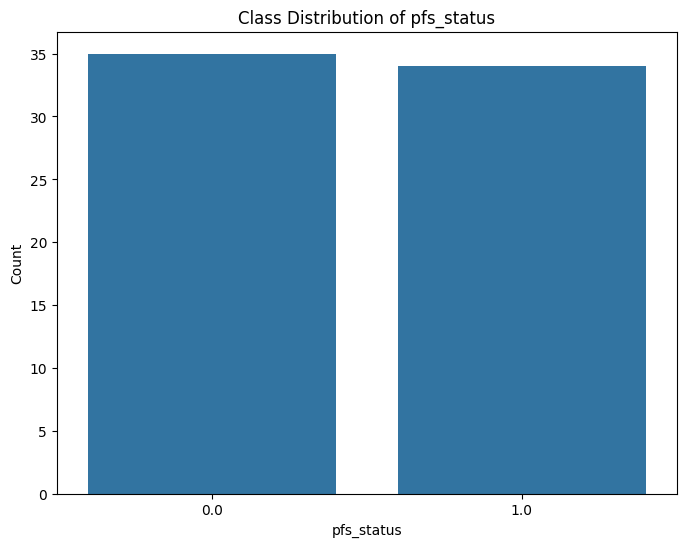

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting class distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=pfs_y)
plt.title('Class Distribution of pfs_status')
plt.xlabel('pfs_status')
plt.ylabel('Count')
plt.show()


In [35]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to dataset
X_resampled, y_resampled = smote.fit_resample(pfs_X, pfs_y)


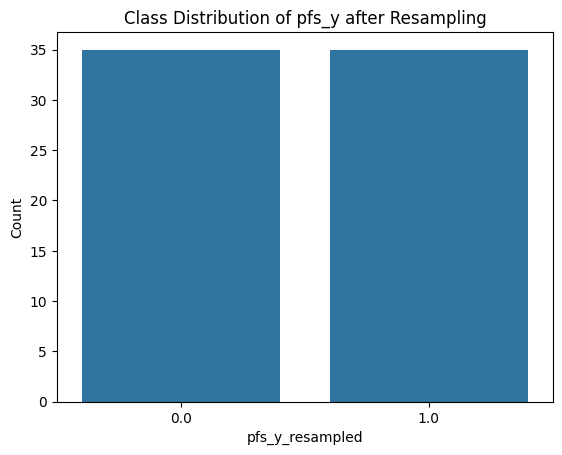

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution plot after resampling
sns.countplot(x=y_resampled)
plt.xlabel('pfs_y_resampled')
plt.ylabel('Count')
plt.title('Class Distribution of pfs_y after Resampling')
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Printing the shapes of the train and test sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (56, 132)
X_test shape: (14, 132)
y_train shape: (56,)
y_test shape: (14,)


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Initializing a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the Decision Tree model
dt_classifier.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluating model performance
print("The Evaluation Metrics for Decision Tree Classifier :")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
print("Accuracy (Decision Tree):", round(accuracy_dt, 2))
print("Precision (Decision Tree):", round(precision_dt,2))
print("Recall (Decision Tree):", round(recall_dt,2))
print("F1-Score (Decision Tree):", round(f1_dt, 2))


The Evaluation Metrics for Decision Tree Classifier :
Accuracy (Decision Tree): 0.64
Precision (Decision Tree): 0.6
Recall (Decision Tree): 0.86
F1-Score (Decision Tree): 0.71


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initializing a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Setting 5 iterations for k-fold
k_fold = KFold(n_splits=3)

# Cross-validation for Decision Tree with k-fold
dt_score = cross_val_score(dt_classifier, X_train, y_train, cv=k_fold)

print("Decision Tree Cross-Validation Score:", dt_score)
print("Mean Decision Tree Cross-Validation Score:", round(dt_score.mean(),2))


Decision Tree Cross-Validation Score: [0.73684211 0.47368421 0.66666667]
Mean Decision Tree Cross-Validation Score: 0.63


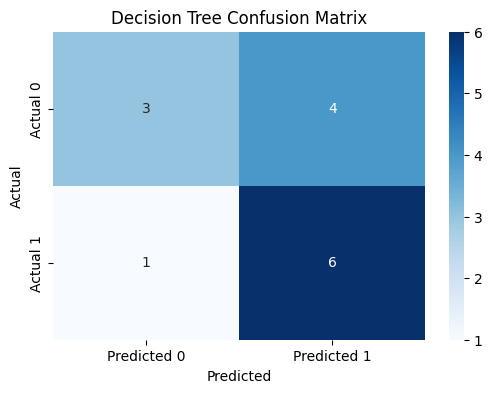

[[3 4]
 [1 6]]


In [40]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_dt)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()
print(conf_mat)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

# Initializing a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Training the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Making predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluating model performance
print("The Evaluation Metrics for Gradient Boosting Classifier :")

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Accuracy (Gradient Boosting):", round(accuracy_gb, 2))
print("Precision (Gradient Boosting):", round(precision_gb,2))
print("Recall (Gradient Boosting):", round(recall_gb,2))
print("F1-Score (Gradient Boosting):", round(f1_gb, 2))


The Evaluation Metrics for Gradient Boosting Classifier :
Accuracy (Gradient Boosting): 0.86
Precision (Gradient Boosting): 0.78
Recall (Gradient Boosting): 1.0
F1-Score (Gradient Boosting): 0.88


In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initializing a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Setting 5 iterations for k-fold
k_fold = KFold(n_splits=3)

# Cross-validation for Gradient Boosting with k-fold
gb_score = cross_val_score(gb_classifier, X_train, y_train, cv=k_fold)

print("Gradient Boosting Cross-Validation Score:", gb_score)
print("Mean Gradient Boosting Cross-Validation Score:", round(gb_score.mean(),2))


Gradient Boosting Cross-Validation Score: [0.63157895 0.47368421 0.5       ]
Mean Gradient Boosting Cross-Validation Score: 0.54


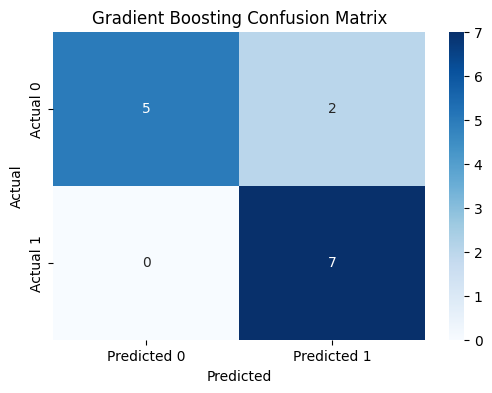

[[5 2]
 [0 7]]


In [43]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_gb)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()
print(conf_mat)

In [44]:
from sklearn.svm import SVC

# Initializing a Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', gamma='scale',random_state=42,probability=True)

# Training the SVM model
svm_classifier.fit(X_train, y_train)

# Making predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating model performance
print("The Evaluation Metrics for SVM Classifier :")
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
print("Accuracy :", round(accuracy_svm, 2))
print("Precision :", precision_svm)
print("Recall :", round(recall_svm,2))
print("F1-Score :", round(f1_svm, 2))


The Evaluation Metrics for SVM Classifier :
Accuracy : 0.64
Precision : 0.75
Recall : 0.43
F1-Score : 0.55


In [45]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

# Initializing a Support Vector Machine Classifier
svm_classifier = SVC(kernel='rbf', gamma='scale',random_state=42,probability=True)

# Setting 5 iterations for k-fold
k_fold = KFold(n_splits=3)

# Cross-validation for SVM with k-fold
svm_score = cross_val_score(svm_classifier, X_train, y_train, cv=k_fold)

print("SVM Cross-Validation Score:", svm_score)
print("Mean SVM Cross-Validation Score:", round(svm_score.mean(),2))


SVM Cross-Validation Score: [0.73684211 0.57894737 0.66666667]
Mean SVM Cross-Validation Score: 0.66


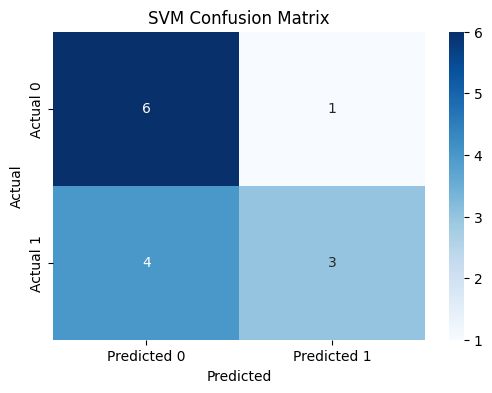

[[6 1]
 [4 3]]


In [46]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()
print(conf_mat)

In [47]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Creating an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Training the classifier
xgb_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluating model performance
print("The Evaluation Metrics for XGBoost Classifier :")

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
print("Accuracy:", round(accuracy,2))
print("Precision:", round(precision,2))
print("Recall:", recall)
print("F1-Score:" , round(f1,2))


The Evaluation Metrics for XGBoost Classifier :
Accuracy: 0.86
Precision: 0.78
Recall: 1.0
F1-Score: 0.88


In [48]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

# Initializing an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Setting 5 iterations for k-fold
k_fold = KFold(n_splits=3)

# Cross-validation for XGBoost with k-fold
xgb_score = cross_val_score(xgb_classifier, X_train, y_train, cv=k_fold)

print("XGBoost Cross-Validation Score:", xgb_score)
print("Mean XGBoost Cross-Validation Score:", round(xgb_score.mean(),2))


XGBoost Cross-Validation Score: [0.73684211 0.63157895 0.61111111]
Mean XGBoost Cross-Validation Score: 0.66


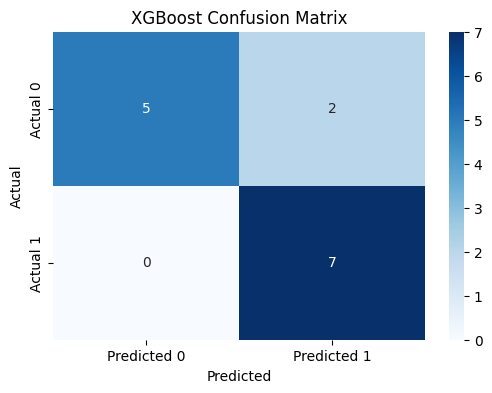

[[5 2]
 [0 7]]


In [49]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()
print(conf_mat)

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

# Initializing a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Training the Random Forest model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluating model performance
print("The Evaluation Metrics for Random Forest Classifier :")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("Accuracy:", round(accuracy_rf,2))
print("Precision:", round(precision,2))
print("Recall:", recall)
print("F1-Score:" , round(f1,2))



The Evaluation Metrics for Random Forest Classifier :
Accuracy: 0.93
Precision: 0.88
Recall: 1.0
F1-Score: 0.93


In [51]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

# Setting 5 iterations for k-fold
k_fold=KFold(n_splits=3)

# Cross-validation for Random Forest with k-fold
rf_score = cross_val_score(rf_classifier, X_train, y_train, cv=k_fold)

print("Random Forest Cross-Validation Score:", rf_score)
print("Mean Random Forest Cross-Validation Score:", round(rf_score.mean(),2))


Random Forest Cross-Validation Score: [0.84210526 0.68421053 0.61111111]
Mean Random Forest Cross-Validation Score: 0.71


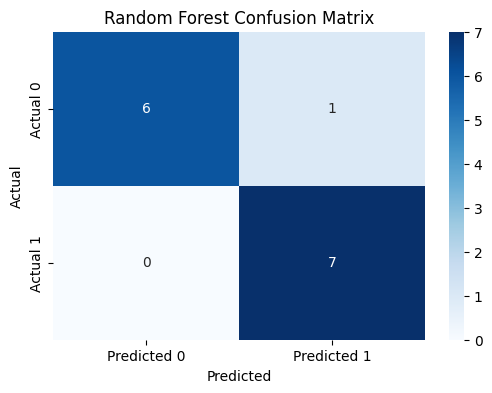

[[6 1]
 [0 7]]


In [52]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()
print(conf_mat)

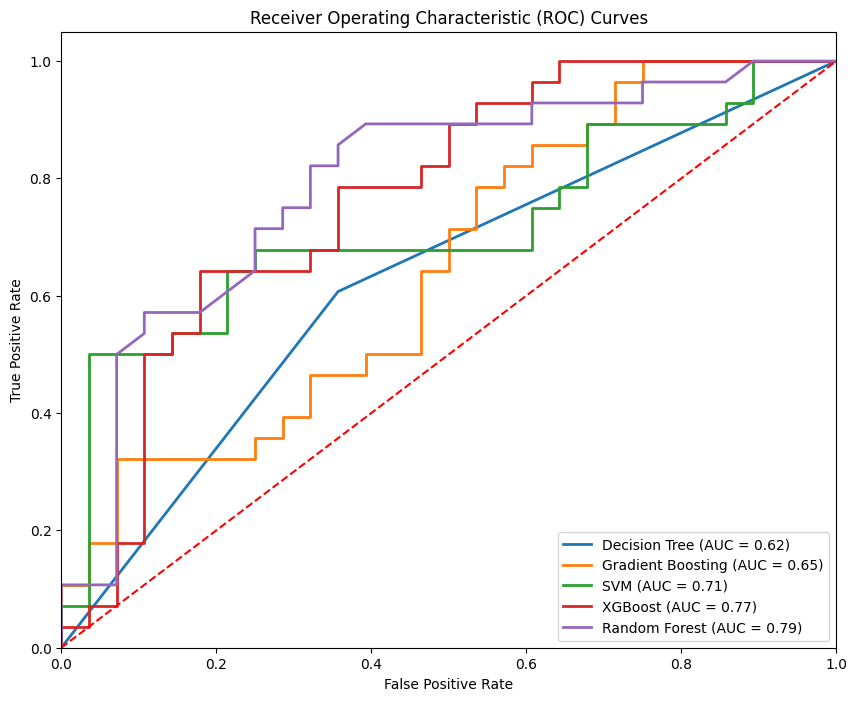

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initializing classifiers
# dt_classifier = DecisionTreeClassifier()
# gb_classifier = GradientBoostingClassifier()
# svm_classifier = SVC(probability=True)
# xgb_classifier = xgb.XGBClassifier()
# rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

classifiers = [dt_classifier, gb_classifier, svm_classifier, xgb_classifier,rf_classifier]
classifier_names = ['Decision Tree', 'Gradient Boosting', 'SVM', 'XGBoost','Random Forest']

plt.figure(figsize=(10, 8))

for clf, name in zip(classifiers, classifier_names):
    # Generating predictions using cross-validation
    predicted = cross_val_predict(clf, X_train, y_train, cv=k_fold, method='predict_proba')

    # Calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_train, predicted[:, 1])

    # Calculate ROC AUC
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


<Figure size 1500x1000 with 0 Axes>

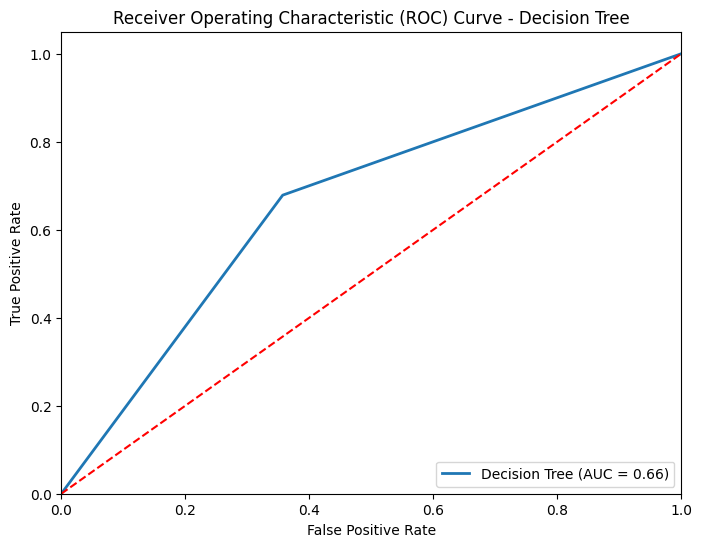

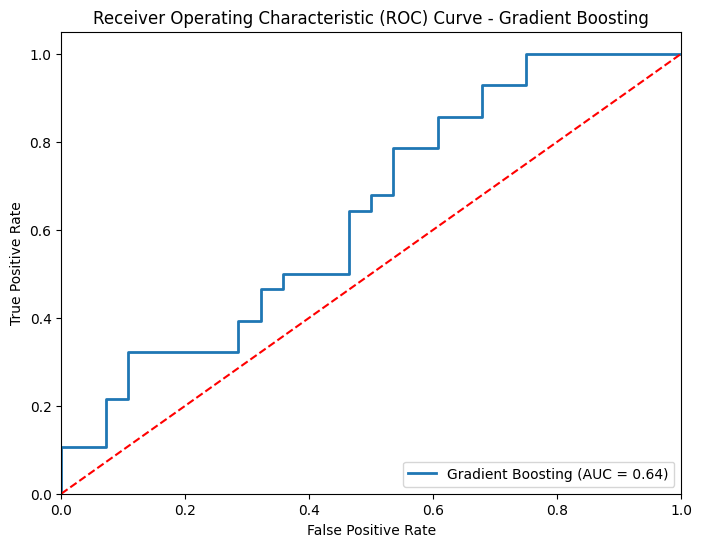

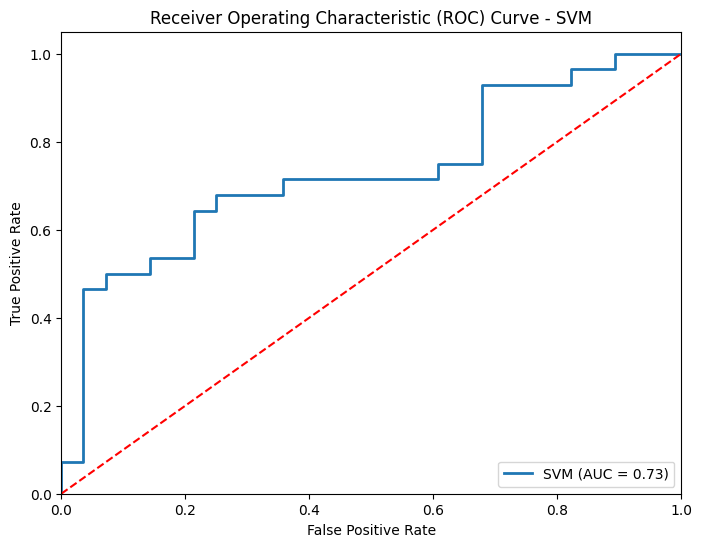

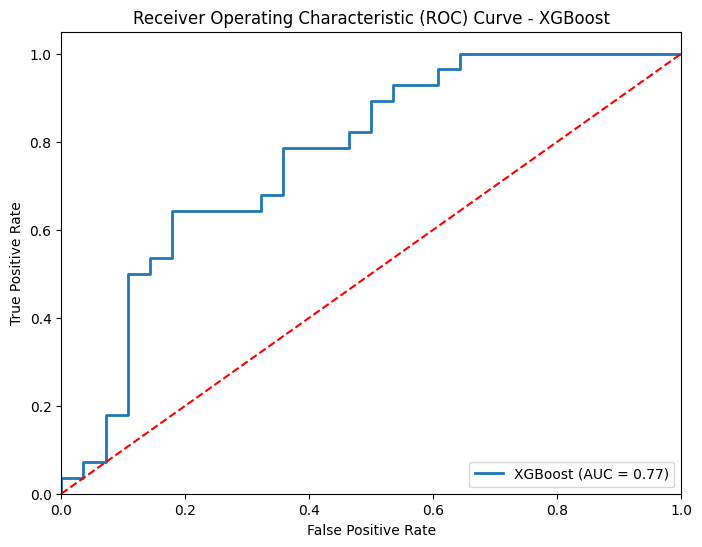

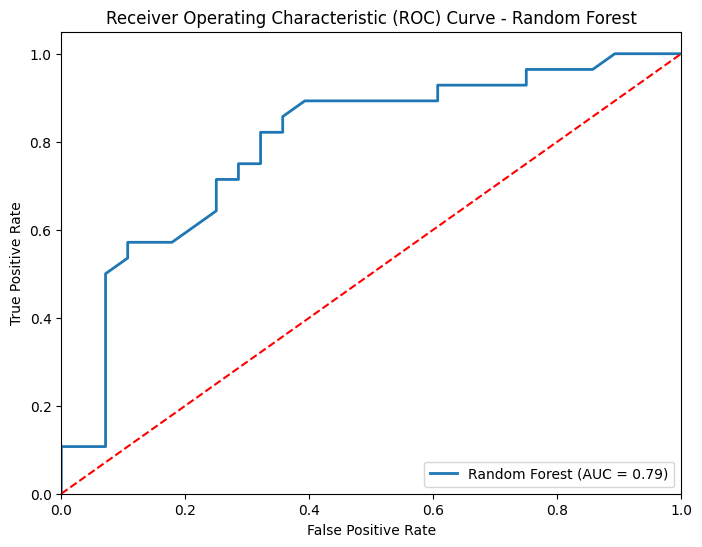

In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Initializing classifiers
dt_classifier = DecisionTreeClassifier()
gb_classifier = GradientBoostingClassifier()
svm_classifier = SVC(probability=True)
xgb_classifier = xgb.XGBClassifier()
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

classifiers = [dt_classifier, gb_classifier, svm_classifier, xgb_classifier, rf_classifier]
classifier_names = ['Decision Tree', 'Gradient Boosting', 'SVM', 'XGBoost', 'Random Forest']

plt.figure(figsize=(15, 10))

for clf, name in zip(classifiers, classifier_names):
    # Generating predictions using cross-validation
    predicted = cross_val_predict(clf, X_train, y_train, cv=k_fold, method='predict_proba')

    # Calculate false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_train, predicted[:, 1])

    # Calculate ROC AUC
    roc_auc = auc(fpr, tpr)

    # Plotting ROC curve for each classifier in a separate plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label='%s (AUC = %0.2f)' % (name, roc_auc))
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve - %s' % name)
    plt.legend(loc="lower right")
    plt.show()
